# Plant Statistics

In [138]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import statsmodels.api as sm

In [139]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Column names

In [140]:
columns = [
    'Day/ Treatment',
    '0,0', '0,3', '0,6', '0,9',
    '0.25,0', '0.25,3', '0.25,6', '0.25,9',
    '0.5,0', '0.5,3', '0.5,6', '0.5,9',
    '0.75,0', '0.75,3', '0.75,6', '0.75,9'
]

In [141]:
def actual_number(val):
    return val != ' ' and \
        val != ',' and \
        val != ', '

In [142]:
def convert_to_df(spreadsheet):
    with open(spreadsheet) as csvfile:
        plant_reader = csv.reader(csvfile)
        scallion_data = [[[height
                           for height in treatment.split(',')
                           if actual_number(height)]
                          for treatment in day
                          if actual_number(day)]
                         for day in plant_reader]
        return pd.DataFrame(scallion_data[1:], columns=columns)

In [143]:
def convert_to_np(scallion_data, treatment):
    scallion_X = np.array([2 * int(x[0])
                           for x in scallion_data['Day/ Treatment']
                           for _ in range(5)])
    
    scallion_y = np.array([[float(y)
                            for y in row]
                           for row in scallion_data[treatment]])
    scallion_y = np.reshape(scallion_y, -1)

    return scallion_X, scallion_y

In [144]:
def linear_model(X, y):
    """Builds a linear model and returns a statsmodels object"""
    results = sm.OLS(y, sm.add_constant(X), nobs=len(y)).fit()
    return results


def resids(X, y, model):
    """Returns a numpy array contatining residuals"""
    return np.array([y_coord - (X[index] * model.params[1] + model.params[0])
                     for index, y_coord in enumerate(y)])

In [145]:
def plot_data(scallion_X, scallion_y, treatment, plant_type):
    fig = plt.gcf()
    fig.canvas.set_window_title('Plant Data')

    results = linear_model(scallion_X, scallion_y)
    X_plot = np.linspace(0, 12, 100)
    plt.plot(X_plot, X_plot * results.params[1] + results.params[0], label='line of best fit')

    plt.xlabel('Time (days)')
    plt.ylabel('Height (cm)')
    plt.title("{} {} Growth Rate".format(treatment, plant_type))
    plt.legend()

    plt.scatter(scallion_X, scallion_y, color='k', s=25, marker='o', label='plant heights')
    plt.show()

In [146]:
def plot_resids(X, y, treatment, plant_type):
    fig = plt.gcf()
    fig.canvas.set_window_title('Plant Residuals')

    y = resids(X, y, linear_model(X, y))
    plt.xlabel('Time (days)')
    plt.ylabel('Residuals (cm)')
    plt.title("{} {} Growth Rate Residuals".format(treatment, plant_type))
    plt.legend()

    plt.scatter(X, y, color='k', s=25, marker='o', label='residuals')
    plt.show()

In [152]:
def plot(X, y, treatment, plant_type):
    plot_data(X, y, treatment, plant_type)
    plot_resids(X, y, treatment, plant_type)

In [153]:
def lin_reg_from_csv(spreadsheet, plant_type):
    data = convert_to_df(spreadsheet)
    growth_X = []
    growth_y = []
    
    for treatment in columns[1:]:
        X, y = convert_to_np(data, treatment)
        plot(X, y, treatment, plant_type)
        model = linear_model(X, y)
        growth_X.append([float(treatment[:-2]), int(treatment[-1:])])
        growth_y.append(model.params[1])
    
    return np.array(growth_X), np.array(growth_y)

## Scallion Linear Regression
Growth rates for the scallion data are plotted below along with residuals.

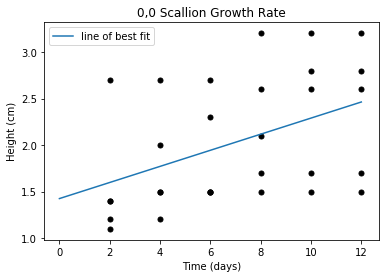

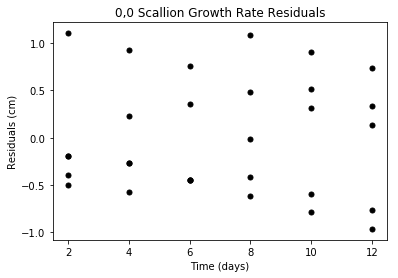

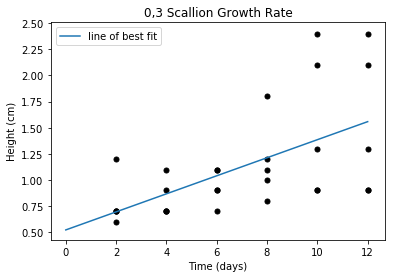

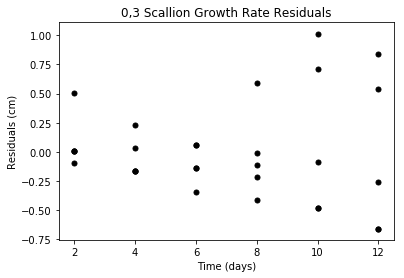

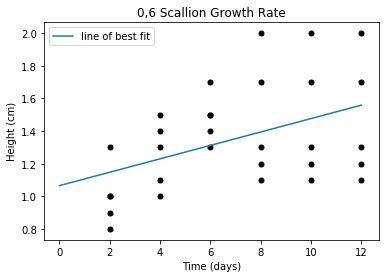

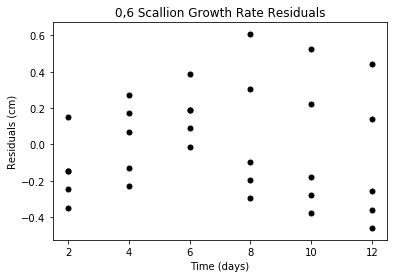

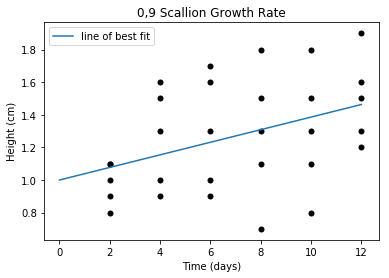

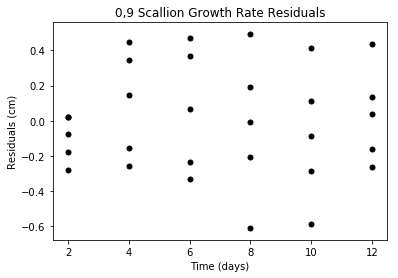

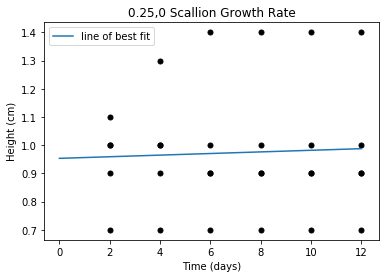

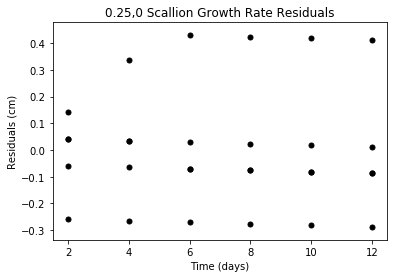

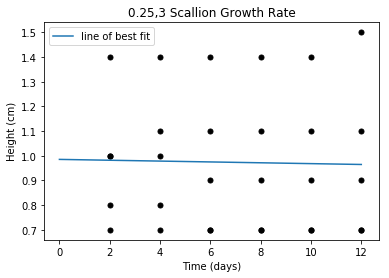

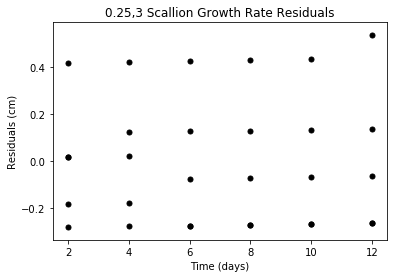

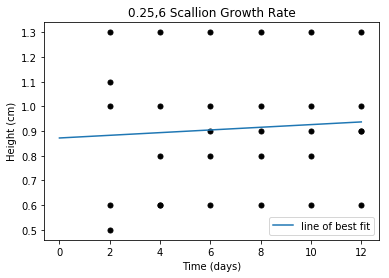

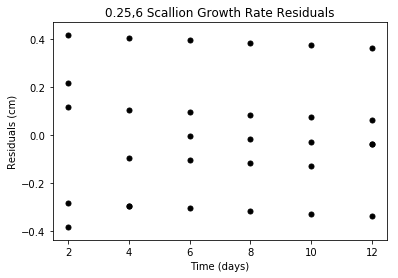

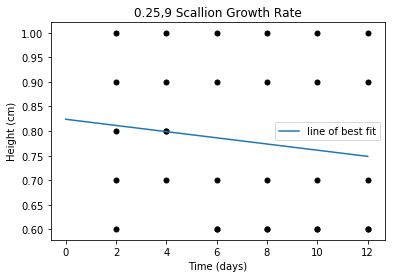

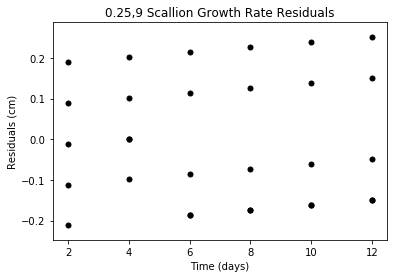

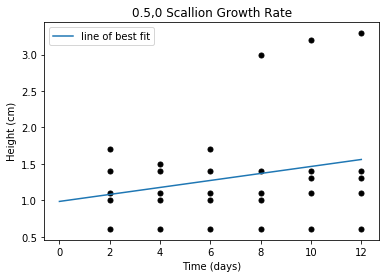

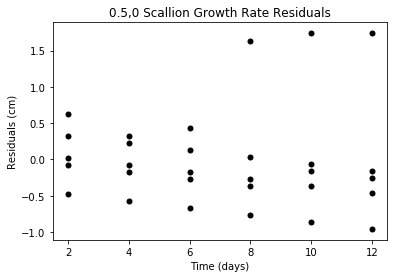

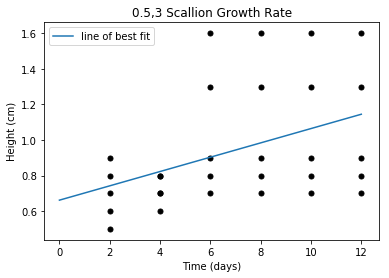

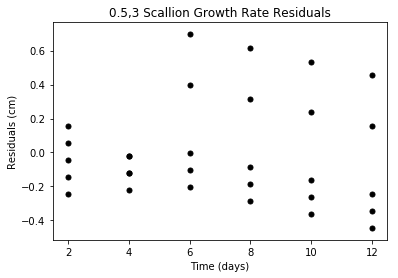

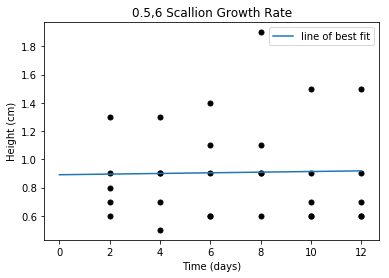

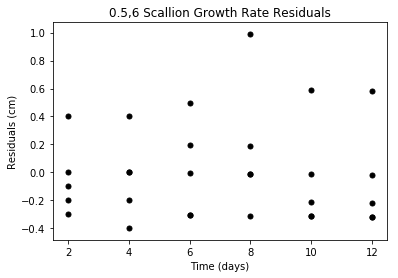

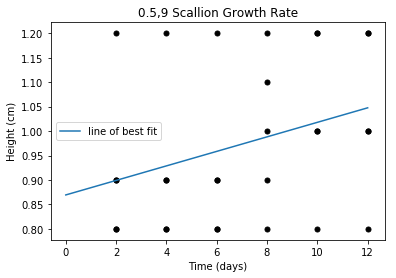

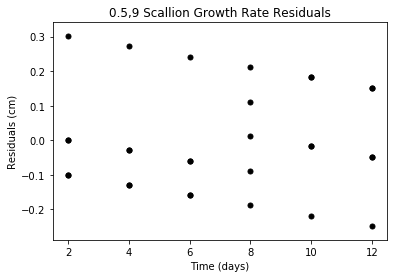

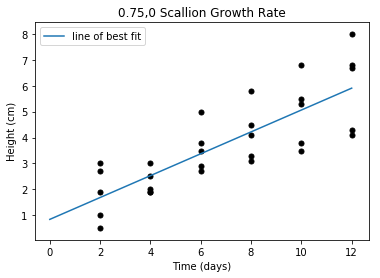

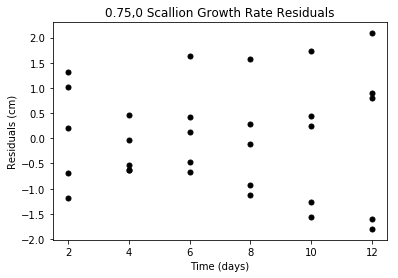

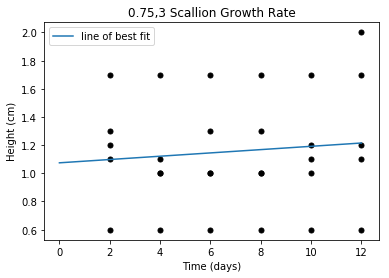

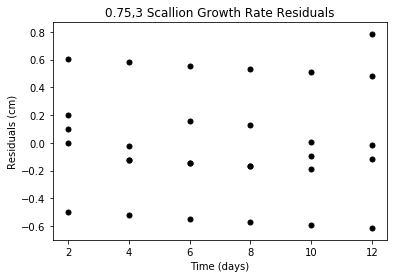

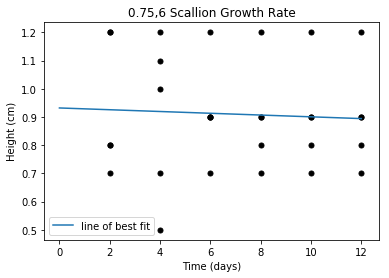

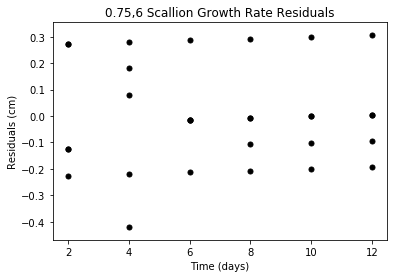

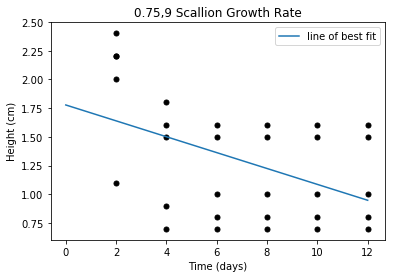

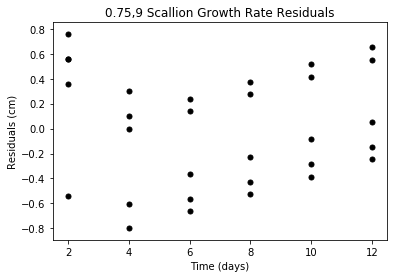

In [154]:
growth_X, growth_y = lin_reg_from_csv("ScallionData.csv", "Scallion")

# Garbanzo Bean Linear Regression
Growth rates for the garbanzo bean data are plotted below along with residuals.

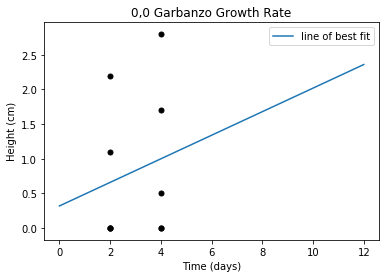

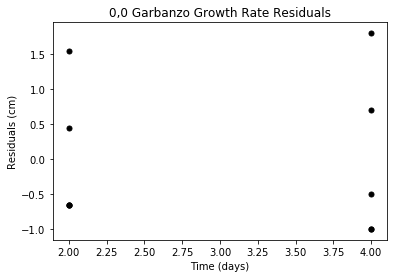

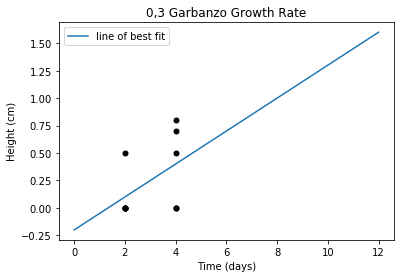

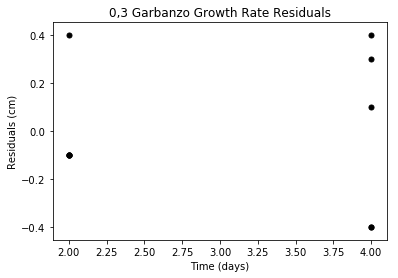

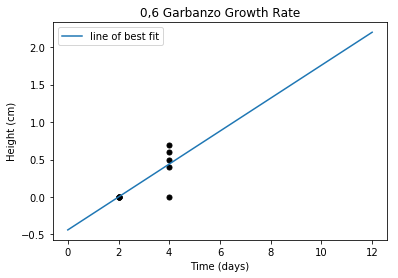

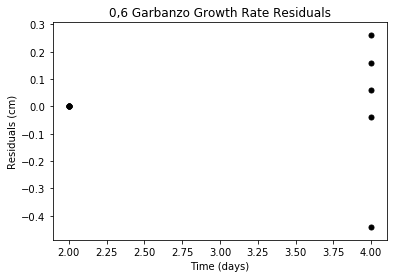

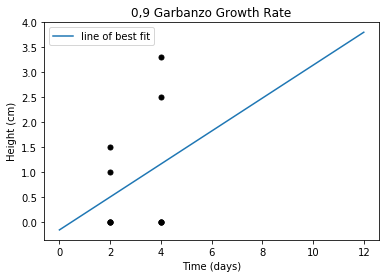

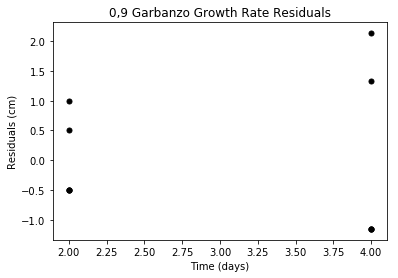

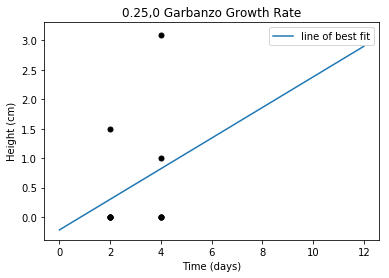

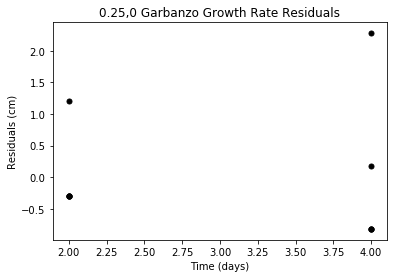

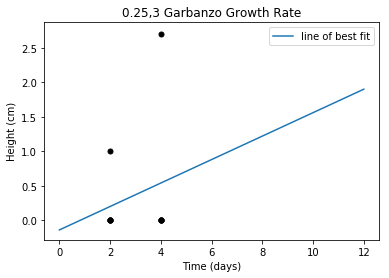

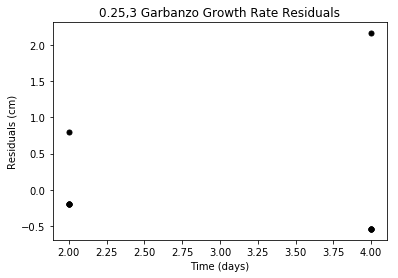

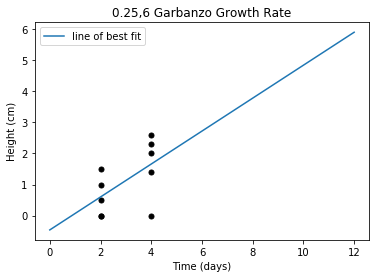

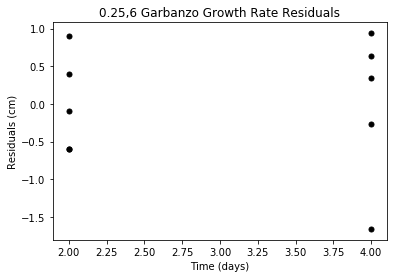

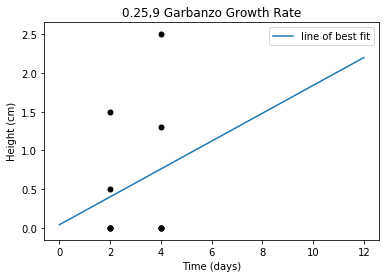

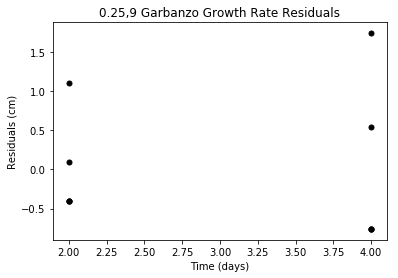

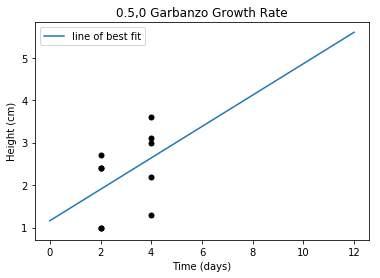

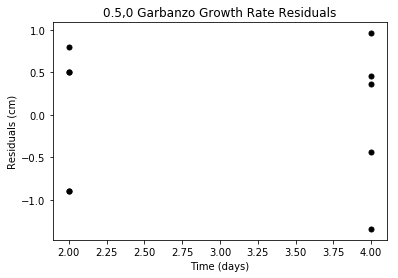

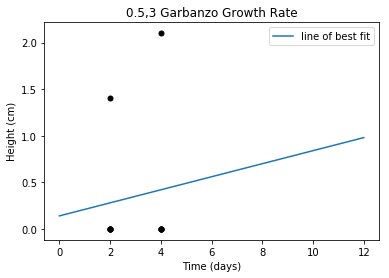

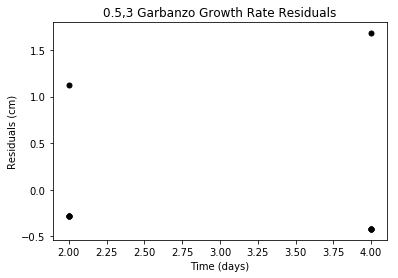

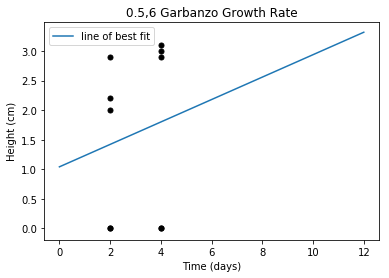

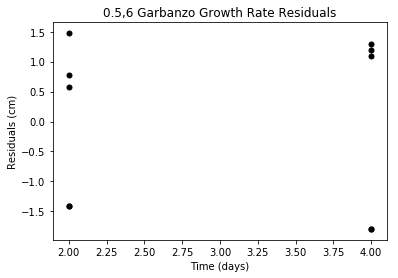

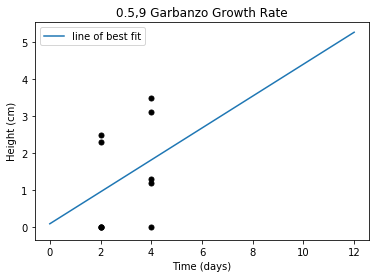

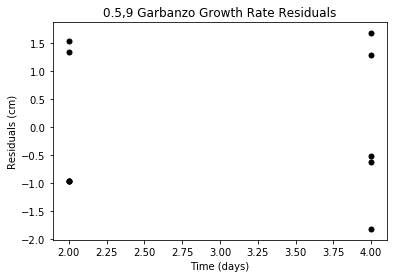

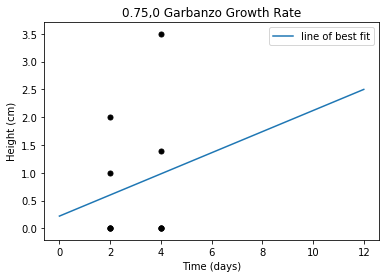

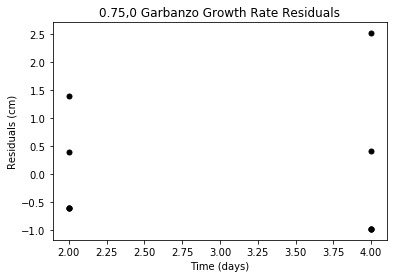

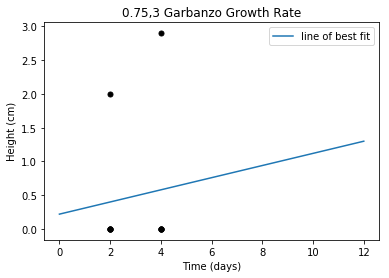

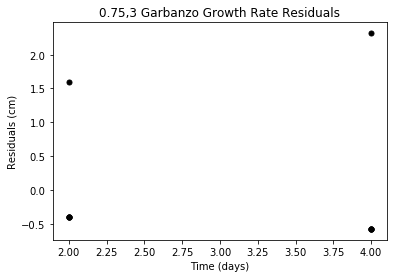

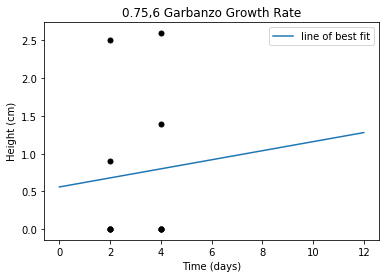

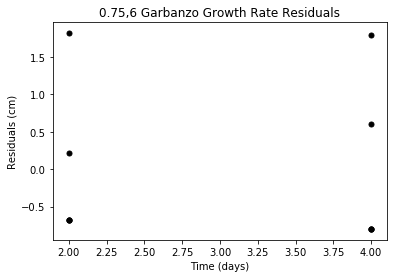

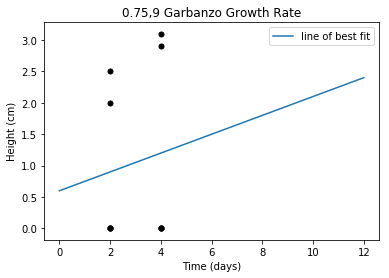

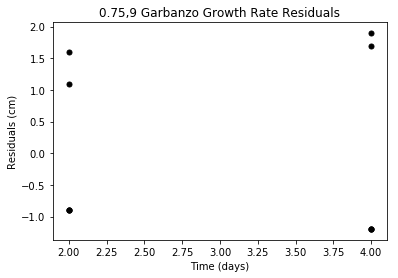

In [160]:
g_growth_X, g_growth_y = lin_reg_from_csv("GarbanzoData.csv", "Garbanzo")

## Scallion Multiple Regression

In [161]:
print(growth_X, growth_y)

(array([[ 0.  ,  0.  ],
       [ 0.  ,  3.  ],
       [ 0.  ,  6.  ],
       [ 0.  ,  9.  ],
       [ 0.25,  0.  ],
       [ 0.25,  3.  ],
       [ 0.25,  6.  ],
       [ 0.25,  9.  ],
       [ 0.5 ,  0.  ],
       [ 0.5 ,  3.  ],
       [ 0.5 ,  6.  ],
       [ 0.5 ,  9.  ],
       [ 0.75,  0.  ],
       [ 0.75,  3.  ],
       [ 0.75,  6.  ],
       [ 0.75,  9.  ]]), array([ 0.08657143,  0.08628571,  0.04114286,  0.03857143,  0.00285714,
       -0.00171429,  0.00542857, -0.00628571,  0.048     ,  0.04028571,
        0.00228571,  0.01485714,  0.422     ,  0.01171429, -0.00314286,
       -0.06914286]))


In [162]:
scallion_growth_model = linear_model(growth_X, growth_y)
print(scallion_growth_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     2.246
Date:                Mon, 29 May 2017   Prob (F-statistic):              0.145
Time:                        17:48:06   Log-Likelihood:                 15.888
No. Observations:                  16   AIC:                            -25.78
Df Residuals:                      13   BIC:                            -23.46
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0976      0.053      1.831      0.0

## Garbanzo Multiple Regression

In [163]:
print(g_growth_X, g_growth_y)

(array([[ 0.  ,  0.  ],
       [ 0.  ,  3.  ],
       [ 0.  ,  6.  ],
       [ 0.  ,  9.  ],
       [ 0.25,  0.  ],
       [ 0.25,  3.  ],
       [ 0.25,  6.  ],
       [ 0.25,  9.  ],
       [ 0.5 ,  0.  ],
       [ 0.5 ,  3.  ],
       [ 0.5 ,  6.  ],
       [ 0.5 ,  9.  ],
       [ 0.75,  0.  ],
       [ 0.75,  3.  ],
       [ 0.75,  6.  ],
       [ 0.75,  9.  ]]), array([ 0.17,  0.15,  0.22,  0.33,  0.26,  0.17,  0.53,  0.18,  0.37,
        0.07,  0.19,  0.43,  0.19,  0.09,  0.06,  0.15]))


In [164]:
garbanzo_growth_model = linear_model(g_growth_X, g_growth_y)
print(garbanzo_growth_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                 -0.034
Method:                 Least Squares   F-statistic:                    0.7552
Date:                Mon, 29 May 2017   Prob (F-statistic):              0.489
Time:                        17:48:43   Log-Likelihood:                 11.149
No. Observations:                  16   AIC:                            -16.30
Df Residuals:                      13   BIC:                            -13.98
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.2375      0.072      3.312      0.0